# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [282]:
#Type your code here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
import joblib


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [283]:
# Tampilkan 5 baris pertama dengan function head.

df = pd.read_csv('bank_transactions_data_edited.csv')

# Tampilkan 5 baris pertama
print("HEAD:")
display(df.head())

HEAD:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [284]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

print("\nINFO:")
df.info()


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance   

In [285]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

print("\nDESCRIBE:")
display(df.describe())


DESCRIBE:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [286]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [287]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [288]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [289]:
# Mengecek dataset menggunakan isnull().sum()

print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [290]:
# Mengecek dataset menggunakan duplicated().sum()

print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


In [291]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df = df.drop(columns=['CustomerID', 'IP Address'], errors='ignore')

In [292]:
# Mengecek dataset menggunakan duplicated().sum()

print("\nJumlah data duplikat:")
print(df.duplicated().sum())

# Mengecek missing value lagi setelah mengisi
print("\nMenangani missing value dengan mengisi menggunakan mean...")
# Select only numeric columns before calculating the mean
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Mengecek missing value lagi setelah mengisi
print("Jumlah missing value per kolom setelah fillna:")
print(df.isnull().sum())


Jumlah data duplikat:
21

Menangani missing value dengan mengisi menggunakan mean...
Jumlah missing value per kolom setelah fillna:
TransactionID              29
AccountID                  21
TransactionAmount           0
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
MerchantID                 23
Channel                    27
CustomerAge                 0
CustomerOccupation         23
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate    24
dtype: int64


In [293]:
# Mengecek dataset menggunakan duplicated().sum()

print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


In [294]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Deteksi kolom kategorikal
kolom_kategorikal = df.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorikal yang akan di-encode:", kolom_kategorikal)

# Lakukan Label Encoding
le = LabelEncoder()
for col in kolom_kategorikal:
    df[col] = le.fit_transform(df[col])

Kolom kategorikal yang akan di-encode: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


In [295]:
print("\nDataFrame setelah Label Encoding:")
display(df.head()) # Pastikan head ditampilkan setelah encoding


DataFrame setelah Label Encoding:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,14.09,680,1,36,365,14,0,70.000000,0,81.0,1.0,5112.21,105
1,1,450,376.24,1178,1,15,50,51,0,68.000000,0,141.0,1.0,13758.91,192
2,2,18,126.29,1262,1,23,229,8,2,19.000000,3,56.0,1.0,1122.35,41
3,3,68,184.50,818,1,33,182,1,2,26.000000,3,25.0,1.0,8569.06,163
4,4,406,13.45,1939,0,1,298,90,2,44.678444,3,198.0,1.0,7429.40,16


In [296]:
# Drop kolom tidak relevan
df = df.drop(columns=['CustomerID', 'IPAddress', 'TransactionID', 'AccountID', 'DeviceID'], errors='ignore')

# Simpan kolom sebelum scaling
nama_kolom_asli = df.columns

In [297]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Ubah ke DataFrame kembali
df_scaled = pd.DataFrame(df_scaled, columns=nama_kolom_asli)

In [298]:
print("\nDataFrame setelah MinMaxScaler:")
display(df_scaled.head()) # Pastikan head ditampilkan setelah scaling


DataFrame setelah MinMaxScaler:


,TransactionAmount,TransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,0.273642,0.5,0.837209,0.14,0.000000,0.838710,0.00,0.244828,0.0,0.336832,0.291667
1,0.195940,0.474044,0.5,0.348837,0.51,0.000000,0.806452,0.00,0.451724,0.0,0.918055,0.533333
2,0.065680,0.507847,0.5,0.534884,0.08,0.666667,0.016129,0.75,0.158621,0.0,0.068637,0.113889
3,0.096016,0.329175,0.5,0.767442,0.01,0.666667,0.129032,0.75,0.051724,0.0,0.569198,0.452778
4,0.006874,0.780282,0.0,0.023256,0.90,0.666667,0.430297,0.75,0.648276,0.0,0.492591,0.044444


In [299]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

print("\nDaftar semua kolom setelah preprocessing:")
print(df_scaled.columns.tolist())


Daftar semua kolom setelah preprocessing:
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [300]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [301]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [302]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [303]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [304]:
# Hapus fitur ID dan tidak relevan untuk clustering
df_scaled = df_scaled.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID'], errors='ignore')

In [305]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_scaled.describe()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,0.154987,0.505298,0.394561,0.495797,0.336487,0.430297,0.382736,0.377320,0.030405,0.336914,0.502754
std,0.151512,0.292010,0.218022,0.288242,0.276882,0.286677,0.287327,0.240408,0.148001,0.260620,0.288797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043156,0.253119,0.500000,0.255814,0.000000,0.145161,0.250000,0.182759,0.000000,0.095323,0.255556
50%,0.111155,0.505030,0.500000,0.488372,0.333333,0.435484,0.500000,0.358621,0.000000,0.317652,0.502778
75%,0.213331,0.758149,0.500000,0.744186,0.666667,0.661290,0.750000,0.520690,0.000000,0.505876,0.755556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [306]:
# Menggunakan algoritma K-Means Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)


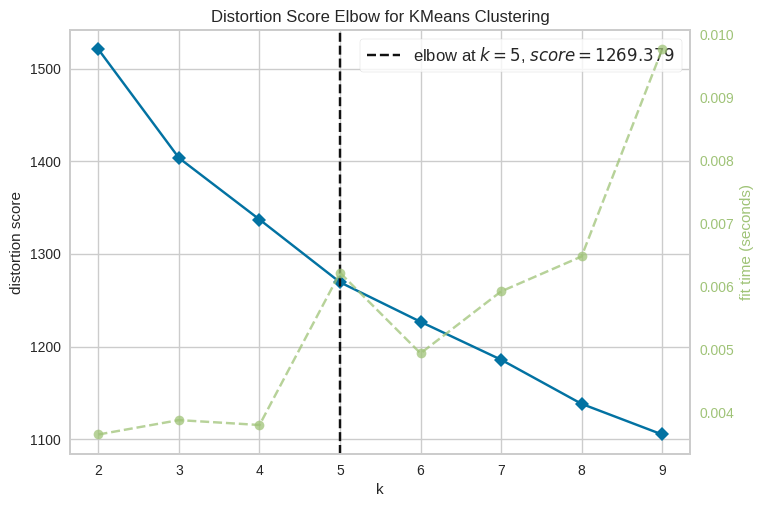

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [307]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_scaled)
visualizer.show()

Jalankan cell code ini untuk menyimpan model kamu.

In [308]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Simpan model
joblib.dump(kmeans, "model_clustering.h5")
print("Model KMeans berhasil disimpan sebagai 'model_clustering.h5'")

# Salin df_scaled ke variabel baru agar tidak hilang
df_clustered = df_scaled.copy()

# Tambahkan kolom Target untuk label cluster
df_clustered['Target'] = kmeans.labels_

# Lihat hasil clustering
df_clustered.head()


Model KMeans berhasil disimpan sebagai 'model_clustering.h5'


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,0.273642,0.5,0.837209,0.000000,0.838710,0.00,0.244828,0.0,0.336832,0.291667,2
1,0.195940,0.474044,0.5,0.348837,0.000000,0.806452,0.00,0.451724,0.0,0.918055,0.533333,2
2,0.065680,0.507847,0.5,0.534884,0.666667,0.016129,0.75,0.158621,0.0,0.068637,0.113889,0
3,0.096016,0.329175,0.5,0.767442,0.666667,0.129032,0.75,0.051724,0.0,0.569198,0.452778,0
4,0.006874,0.780282,0.0,0.023256,0.666667,0.430297,0.75,0.648276,0.0,0.492591,0.044444,1


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [309]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [310]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [311]:
# Membangun model menggunakan PCA.

In [312]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [313]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Hitung statistik deskriptif per cluster
cluster_stats = df_clustered.groupby('Target').agg(['mean', 'min', 'max'])

# Tampilkan hasilnya
pd.set_option('display.max_columns', None)  # agar semua kolom tampil
cluster_stats

TransactionAmount                     TransactionDate                 \
                    mean       min       max            mean       min  max   
Target                                                                        
0               0.161753  0.000000  0.918269        0.500066  0.000000  1.0   
1               0.154402  0.000813  0.954092        0.517945  0.000805  1.0   
2               0.151115  0.000031  1.000000        0.499200  0.001207  1.0   

       TransactionType            Location             Channel            \
                  mean  min  max      mean  min  max      mean       min   
Target                                                                     
0             0.400442  0.0  1.0  0.496124  0.0  1.0  0.331367  0.000000   
1             0.266373  0.0  1.0  0.494230  0.0  1.0  0.600336  0.333333   
2             0.486385  0.0  1.0  0.496757  0.0  1.0  0.143036  0.000000   

                 CustomerAge                     CustomerOccupation        \
             max        mean       min       max               mean   min   
Target                                                                      
0       1.000000    0.088940  0.000000  0.693548           0.748525  0.25   
1       1.000000    0.555783  0.129032  1.000000           0.257872  0.00   
2       0.666667    0.554058  0.129032  1.000000           0.242958  0.00   

            TransactionDuration                     LoginAttempts            \
        max                mean       min       max          mean  min  max   
Target                                                                        
0       1.0            0.378998  0.003448  0.996552      0.030460  0.0  1.0   
1       1.0            0.367118  0.000000  1.000000      0.034435  0.0  1.0   
2       1.0            0.383859  0.000000  1.000000      0.027366  0.0  1.0   

       AccountBalance                     PreviousTransactionDate            \
                 mean       min       max                    mean       min   
Target                                                                        
0            0.102353  0.000000  0.662923                0.496395  0.002778   
1            0.419321  0.005611  0.993532                0.499006  0.000000   
2            0.424803  0.000774  1.000000                0.509596  0.000000   

             
        max  
Target       
0       1.0  
1       1.0  
2       1.0

In [314]:
numerical_cols = df_inverse.select_dtypes(include=['number']).columns
grouped = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])
display(grouped)


TransactionAmount                TransactionDate               \
                    mean   min      max            mean  min     max   
Target                                                                 
0             310.473776  0.26  1762.28     1246.518519  0.0  2485.0   
1             290.822890  0.32  1919.11     1185.451260  2.0  2485.0   
2             295.114184  0.84  1647.74     1329.721812  3.0  2485.0   

       TransactionType             Location            MerchantID              \
                  mean  min  max       mean  min   max       mean  min    max   
Target                                                                          
0             0.800000  0.0  2.0  21.368889  0.0  43.0  49.179259  0.0  100.0   
1             0.819277  0.0  2.0  19.723987  0.0  43.0  47.089814  0.0  100.0   
2             0.752371  0.0  2.0  22.818757  0.0  43.0  51.219178  0.0  100.0   

         Channel           CustomerAge             CustomerOccupation       \
            mean  min  max        mean   min   max               mean  min   
Target                                                                       
0       0.992593  0.0  3.0   23.602963  18.0  66.0           3.016296  1.0   
1       0.978094  0.0  3.0   52.107064  26.0  80.0           0.945235  0.0   
2       1.051633  0.0  3.0   52.522089  26.0  80.0           1.037935  0.0   

            TransactionDuration              LoginAttempts            \
        max                mean   min    max          mean  min  max   
Target                                                                 
0       4.0          119.528204  11.0  299.0      1.116456  1.0  5.0   
1       4.0          124.357147  10.0  300.0      1.118528  1.0  5.0   
2       4.0          114.601036  10.0  298.0      1.128272  1.0  5.0   

       AccountBalance                   PreviousTransactionDate                \
                 mean     min       max                    mean    min    max   
Target                                                                          
0         1655.653504  101.25   9963.39              179.902222    1.0  360.0   
1         6548.217434  112.76  14942.78              272.017525  133.0  360.0   
2         6192.522537  173.70  14977.99               94.192835    0.0  236.0   

       Target          
         mean min max  
Target                 
0         0.0   0   0  
1         1.0   1   1  
2         2.0   2   2

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

1. **Cluster 0: (Nasabah Muda dengan Transaksi Besar dan Aktivitas Rendah)**:
  - Rata-rata TransactionAmount: **310.47**
  - Rata-rata AccountBalance: **101.25**
  - Rata-rata CustomerAge: **23.60**
  - Rata-rata LoginAttempts: **1.116**
  - Rata-rata TransactionDuration: **119.53**
  - Rata-rata PreviousTransactionDate: **179.90**
  - **Analisis:** Nasabah dalam cluster ini relatif muda dengan saldo akun yang sangat rendah namun memiliki nilai transaksi yang tinggi. Mereka tidak terlalu sering login dan memiliki interval transaksi yang tidak terlalu jauh. Hal ini bisa mengindikasikan bahwa mereka adalah pengguna aktif tetapi tidak menyimpan dana dalam jumlah besar.

2. **Cluster 1: (Nasabah Usia Menengah dengan Saldo Tinggi dan Aktivitas Stabil)**:
  - Rata-rata TransactionAmount: **290.82**
  - Rata-rata AccountBalance: **112.76**
  - Rata-rata CustomerAge: **52.11**
  - Rata-rata LoginAttempts: **1.118**
  - Rata-rata TransactionDuration: **124.36**
  - Rata-rata PreviousTransactionDate: **272.01**

  - **Analisis:** Kelompok ini merupakan nasabah dengan usia lebih matang dan saldo rekening cukup tinggi. Frekuensi login cukup stabil dan transaksi mereka tersebar secara konsisten dalam periode waktu. Nilai transaksi mereka sedikit lebih kecil, tetapi tetap menunjukkan pola konsumsi yang teratur.

3. **Cluster 2: (Nasabah Usia Menengah dengan Aktivitas Tinggi dan Saldo Rendah)**:
  - Rata-rata TransactionAmount: **295.11**
  - Rata-rata AccountBalance: **173.70**
  - Rata-rata CustomerAge: **52.52**
  - Rata-rata LoginAttempts: **1.128**
  - Rata-rata TransactionDuration: **114.60**
  - Rata-rata PreviousTransactionDate: **94.19**

  - **Analisis:** Nasabah dalam cluster ini cukup aktif secara transaksi, dengan jarak antar transaksi yang relatif pendek. Usia mereka menengah, namun saldo rata-rata masih tergolong rendah. Login lebih sering dibanding cluster lain, yang bisa menandakan keterlibatan digital yang lebih tinggi.

In [315]:
# Simpan hasil inverse + Target ke CSV
df_inverse.to_csv("data_clustering_inverse.csv", index=False)
print("Hasil clustering dengan nilai asli disimpan ke 'data_clustering_inverse.csv'")


Hasil clustering dengan nilai asli disimpan ke 'data_clustering_inverse.csv'


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [316]:
# Jika butuh load ulang hasil clustering
import pandas as pd
df_inverse = pd.read_csv("data_clustering_inverse.csv")


In [317]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Pisahkan fitur (X) dan target (y)
X = df_inverse.drop(columns=["Target"])
y = df_inverse["Target"]


In [318]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df_inverse.to_csv("data_clustering.csv", index=False)


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [319]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [320]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [321]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [322]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)